In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [65]:
main_image = cv2.rotate(np.load('carseg_data/clean_data/0_a.npy')[:3].T, cv2.ROTATE_90_CLOCKWISE)
rotated_image = cv2.rotate(main_image, cv2.ROTATE_90_CLOCKWISE)
feature_extraction = cv2.rotate(np.load('carseg_data/clean_data/0_a.npy')[3:4].T, cv2.ROTATE_90_CLOCKWISE)

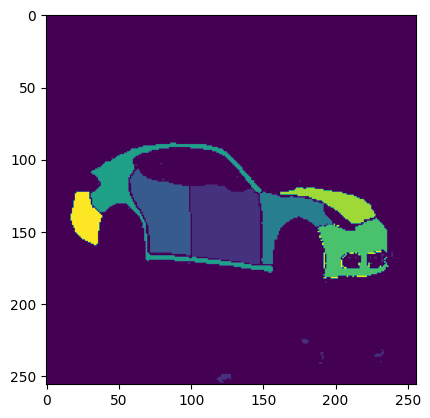

In [71]:
plt.imshow(feature_extraction)
plt.show()

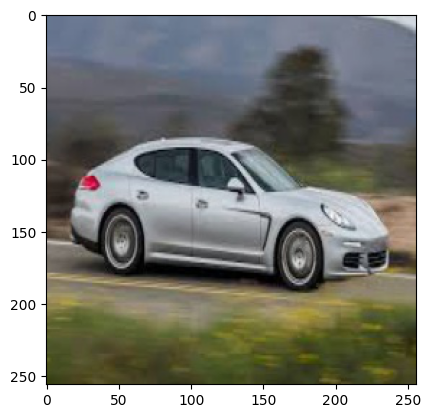

In [70]:
plt.imshow(main_image)
plt.show()

In [ ]:
cv2.imshow('dagar', test_image[:3].T)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
'''
TODO:
1. Take one image and append it to a dataset(data matrix X and response Y) to be passed on to the actual Deep learning model
2. Create a loop to take iamges from a directory and create a matrix of n dimensions of images 
3. Make the code dynamic to take images from multiple directories to create the data matrix
4. Make the code take a number of arguments to specify sizes of the different sets and create train, test, val set of specified values
'''

In [181]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import datasets
from torchvision.transforms import ToTensor

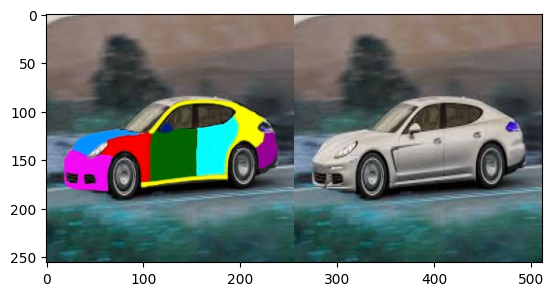

In [34]:
split_image = cv2.imread('carseg_data/carseg_raw_data/train/photo/0_a.jpg')
plt.imshow(split_image)

In [41]:
split_image.shape[1]

512

In [166]:
x = split_image[:,int(512/2):512, :3]
y = split_image[:,:int(512/2), :3] 

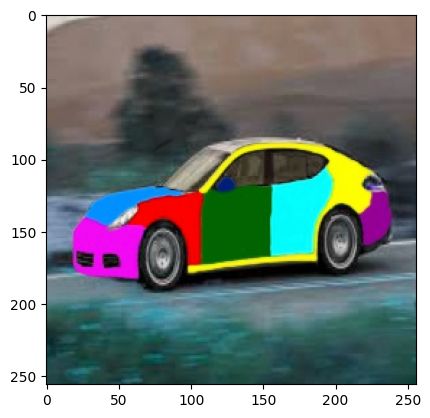

In [40]:
plt.imshow(split_image[:,:int(512/2), :3])

In [148]:
class CarSegmentationDataset(Dataset):
    def __init__(self, image_directory_one, transform=None):
        self.car_images_one = os.listdir(image_directory_one)
        self.directory_one = image_directory_one
        self.transform = transform

    def __len__(self):
        return len(self.car_images_one)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.directory_one, self.car_images_one[index])
        X_train =  cv2.rotate(np.load(img_path)[:3].T, cv2.ROTATE_90_CLOCKWISE)
        y_train = cv2.rotate(np.load(img_path)[3:4].T, cv2.ROTATE_90_CLOCKWISE)
        
        return {'X': X_train, 'y': y_train}

In [149]:
new_class = CarSegmentationDataset('carseg_data/clean_data/')

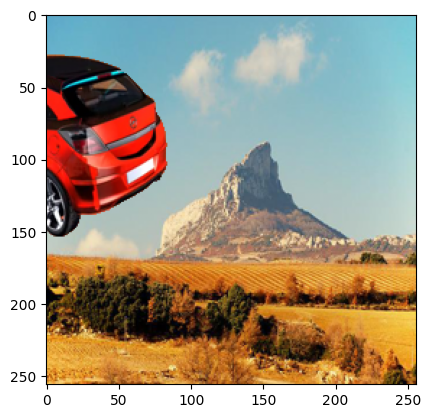

In [180]:
plt.imshow(new_class[1]['X'])
plt.show()